# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.utils as sk

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [12]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [13]:
# Define alpha_func
def alpha_func(df, idx):
    # Assuming df contains the Iris dataset with columns 'sepal length (cm)' and 'sepal width (cm)'
    sepal_width_bootstrap = df.loc[idx, 'Sepal.Width']
    sepal_length_bootstrap = df.loc[idx, 'Sepal.Length']
    
    # Here, we can compute alpha using any statistic, e.g., correlation coefficient
    # Let's compute the Pearson correlation coefficient as an example
    correlation_matrix = np.corrcoef(sepal_width_bootstrap, sepal_length_bootstrap)
    alpha = correlation_matrix[0, 1]  # Pearson correlation coefficient
    
    return alpha


Test the code below

In [14]:
alpha_func(df, range(100))

-0.20592575599067026

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [15]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

-0.2687943979274062

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

Relying on the mean to assess average length is making a judgement based on only one point of data. Taking repeated measures from the same sample with bootstrapping would give us a distribution of means, which would better shed light on the true variability of sepal length without having to take repeated samples from the population. 

In [25]:
# Function to compute bootstrap standard error (SE)
def boot_SE(data, statistic_func, n_bootstrap=1000, random_seed=None):
    # Set random seed for reproducibility
    np.random.seed(random_seed)
    
    # Number of data points
    n = len(data)
    
    # Initialize an array to store bootstrap samples
    bootstrap_samples = np.zeros(n_bootstrap)
    
    # Generate bootstrap samples and compute statistic
    for i in range(n_bootstrap):
        # Generate bootstrap sample (sample with replacement)
        bootstrap_sample = sk.resample(data)

        # Compute statistic of interest on bootstrap sample
        statistic = statistic_func(bootstrap_sample)
        
        # Store statistic in bootstrap_samples array
        bootstrap_samples[i] = statistic
    
    # Calculate standard error (SE) of bootstrap samples
    boot_se = np.std(bootstrap_samples)
    
    return boot_se

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [27]:
bootstrap_se = boot_SE(df["Sepal.Length"], np.mean, n_bootstrap=1000, random_seed=42)
bootstrap_se

0.06702629798652003

_(vi)_ What is the original mean value of `Sepal.Length`?

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [48]:
# Function to compute bootstrap standard error (SE) and its range
def boot_SE_and_range(data, statistic_func, n_bootstrap=1000, random_seed=None):
    # Set random seed for reproducibility
    np.random.seed(random_seed)
    
    # Number of data points
    n = len(data)
    
    # Initialize an array to store bootstrap samples
    bootstrap_samples = np.zeros(n_bootstrap)
    
    # Generate bootstrap samples and compute statistic
    for i in range(n_bootstrap):
        # Generate bootstrap sample (sample with replacement)
        bootstrap_sample = sk.resample(data)
        
        # Compute statistic of interest on bootstrap sample
        statistic = statistic_func(bootstrap_sample)
        
        # Store statistic in bootstrap_samples array
        bootstrap_samples[i] = statistic
    
    # Calculate standard error (SE) of bootstrap samples
    boot_se = np.std(bootstrap_samples)
    
    # Calculate range of bootstrapped standard errors
    boot_se_samples_range = np.ptp(bootstrap_samples)
    
    return boot_se, boot_se_samples_range, np.mean(bootstrap_samples), bootstrap_samples


In [49]:
boot_SE_and_range(df["Sepal.Length"], np.mean, n_bootstrap=1000, random_seed=42)

(0.06702629798652003,
 0.46200000000000063,
 5.844700666666666,
 array([5.91133333, 5.84266667, 5.764     , 5.93466667, 5.81466667,
        5.83666667, 5.90133333, 5.774     , 5.79733333, 5.764     ,
        5.862     , 5.88      , 5.888     , 5.792     , 5.93666667,
        5.86466667, 5.86733333, 5.87133333, 5.87733333, 5.84533333,
        5.842     , 5.83      , 5.85666667, 5.942     , 5.794     ,
        5.88933333, 5.8       , 5.906     , 5.84      , 5.89666667,
        5.86733333, 5.852     , 5.91466667, 5.80866667, 5.95733333,
        5.81733333, 5.894     , 5.78266667, 5.85533333, 5.918     ,
        5.95533333, 5.84133333, 5.88866667, 5.81066667, 5.79133333,
        5.84333333, 5.83466667, 5.93      , 5.85933333, 5.95      ,
        6.00466667, 5.85533333, 5.80666667, 5.85466667, 5.86933333,
        5.858     , 5.816     , 5.83133333, 5.85066667, 5.77333333,
        5.77066667, 5.93133333, 5.854     , 5.92666667, 5.82333333,
        5.89666667, 5.81133333, 5.82133333, 5.832   

In [35]:
np.mean(df["Sepal.Length"]),np.std(df["Sepal.Length"])

(5.843333333333334, 0.8253012917851409)

_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [61]:
bootstrap_samples = boot_SE_and_range(df["Sepal.Length"], np.mean, 1000,42)[3]


lower_percentile = (0.05 / 2) * 100
upper_percentile = 100 - lower_percentile

np.percentile(bootstrap_samples, [lower_percentile, upper_percentile])
    


array([5.71063333, 5.97268333])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

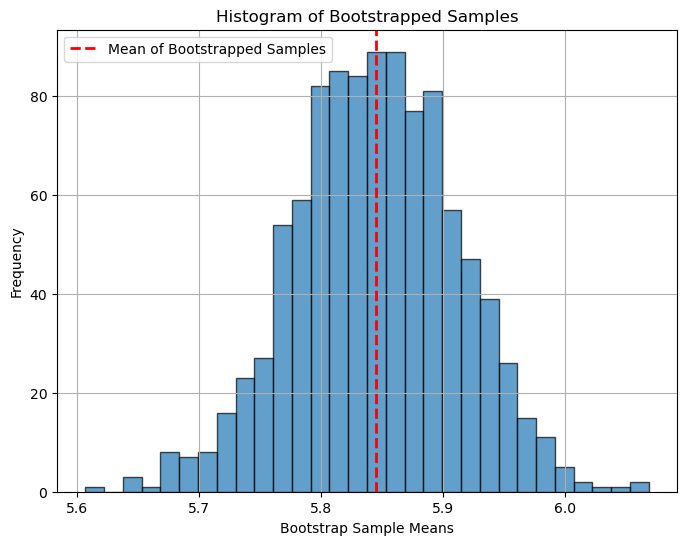

In [55]:
#Complete this


plt.figure(figsize=(8, 6))
plt.hist(bootstrap_samples, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(bootstrap_samples), color='red', linestyle='--', linewidth=2, label='Mean of Bootstrapped Samples')
plt.title('Histogram of Bootstrapped Samples')
plt.xlabel('Bootstrap Sample Means')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

Based on our findings it would make the most sense to assume that the average sepal length is 5.84, plus or minus  0.13. They should err on the larger side if they want to pack the most irises possible or the smaller side if they want to minimize the space used.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
